# Tensorflow 2.0 Experiment 

this code trains a Recurrent Nueral Network to do multiclass classification using Tensorflow 2.0 

In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [82]:
import pandas as pd 
import numpy as np
import nltk
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing, model_selection

In [96]:
#helper function to plot graphs
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [6]:
#import the data 

In [8]:
df = pd.read_csv("c:/Users/rclukey/Google Drive/inventory_class/new_training_LC.csv")
df.head()

,,LEAF_CLASS_ID,LEAF_CLASS_NAME,ITEM_PUB_KEY,ITEM_NUMBER,VENDOR_CATALOG_NUMBER,PRODUCT_NAME,DESCRIPT,LEAF_CLASS_ID_COUNT
0,1,739,Remote Controls,123826525,32,SRT-PC,REMOTE CONTROL,SPCTRM SRT-PC REMOTE CONTROL,9
1,2,739,Remote Controls,123826526,33,SRT-ORB,REMOTE CONTROL,SPCTRM SRT-ORB REMOTE CONTROL,9
2,3,739,Remote Controls,123826531,38,SRC-SN,REMOTE CONTROL,SPCTRM SRC-SN REMOTE CONTROL,9
3,4,739,Remote Controls,123826532,39,SRC-PC,REMOTE CONTROL,SPCTRM SRC-PC REMOTE CONTROL,9
4,5,739,Remote Controls,123826524,31,SRT-SN,REMOTE CONTROL,SPCTRM SRT-SN REMOTE CONTROL,9


In [47]:
df.shape

(10000, 9)

In [105]:
tfidf_vect = TfidfVectorizer(stop_words='english', sublinear_tf=True, strip_accents='unicode', analyzer='char', 
                              token_pattern=r'\w{2,}', max_df=.25, ngram_range=(1,3), max_features=10000)

In [106]:
X = df['DESCRIPT']

In [67]:
Y = df['LEAF_CLASS_ID']
len(Y)
Y.nunique()

168

In [42]:
Y_oh = tf.one_hot(indices=Y, depth=168)
print(Y_oh)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 168), dtype=float32)


In [71]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
y = np_utils.to_categorical(Y)
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [107]:
tfidf_vect.fit(df['DESCRIPT'])

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=10000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w{2,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [108]:
X_tfidf = tfidf_vect.transform(X)

In [109]:
X_tfidf

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 564431 stored elements in Compressed Sparse Row format>

In [14]:
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [110]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X_tfidf,y, test_size=0.33)

In [114]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [103]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D

In [124]:
input_dim = 10000

model = Sequential()
model.add(Dense(64, input_dim = input_dim, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(168, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, batch_size=10, validation_split=0.3)
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 4690 samples, validate on 2010 samples
Epoch 1/10
4690/4690 [==============================] - 22s 5ms/sample - loss: 2.4042 - accuracy: 0.4840 - val_loss: 1.3189 - val_accuracy: 0.7114
Epoch 2/10
4690/4690 [==============================] - 21s 5ms/sample - loss: 0.9889 - accuracy: 0.7755 - val_loss: 0.8843 - val_accuracy: 0.8279
Epoch 3/10
4690/4690 [==============================] - 21s 4ms/sample - loss: 0.6006 - accuracy: 0.8595 - val_loss: 0.7796 - val_accuracy: 0.8602
Epoch 4/10
4690/4690 [==============================] - 21s 5ms/sample - loss: 0.3828 - accuracy: 0.9068 - val_loss: 0.6026 - val_accuracy: 0.8970
Epoch 5/10
4690/4690 [==============================] - 22s 5ms/sample - loss: 0.3157 - accuracy: 0.9179 - val_loss: 0.7130 - val_accuracy: 0.8920
Epoch 6/10
4690/4690 [==============================] - 21s 5ms/sample - loss: 0.2200 - accuracy: 0.9409 - val_loss: 0.5968 - val_accuracy: 0.9154
Epoch 7/10
4690/4690 [==============================] - 21s 4ms/sample

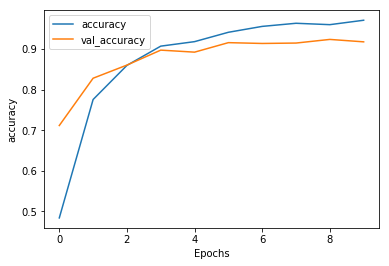

In [125]:
plot_graphs(history,  'accuracy')

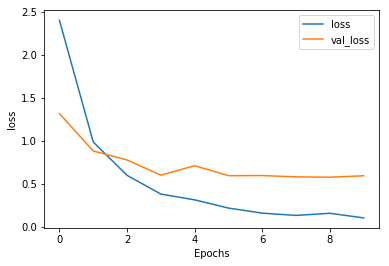

In [126]:
plot_graphs(history, 'loss')

In [ ]:
tokenizer = info.features['text'].encoder

In [116]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [117]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [118]:
history = model.fit(train_x, train_y, epochs=10, batch_size=2, validation_split=0.3)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=  (0, 154)	0.07979262662791708
  (0, 167)	0.14680568429210422
  (0, 336)	0.08330825645691099
  (0, 350)	0.1439363372907167
  (0, 429)	0.10024374428625953
  (0, 435)	0.10572985686480439
  (0, 616)	0.15008625049478638
  (0, 1171)	0.15927478520425659
  (0, 1179)	0.1187508090131494
  (0, 1183)	0.12716420420055394
  (0, 1228)	0.17051167628023745
  (0, 1230)	0.18946316334819815
  (0, 1473)	0.20006086045563043
  (0, 1475)	0.15323156641855148
  (0, 1482)	0.1791014695709775
  (0, 2044)	0.0880045901852904
  (0, 2050)	0.12014061972510284
  (0, 3379)	0.07009019575016517
  (0, 3384)	0.13734126726881898
  (0, 3857)	0.12529598814314372
  (0, 3867)	0.18946316334819815
  (0, 4223)	0.10409167042121395
  (0, 4226)	0.2022922745797025
  (0, 4412)	0.05755509614884256
  (0, 4578)	0.1398316824068051
  :	:
  (6699, 5489)	0.1671427878078952
  (6699, 5499)	0.11173610372611903
  (6699, 5551)	0.10349711599546825
  (6699, 5997)	0.1108472110929906
  (6699, 6002)	0.13018227875443295
  (6699, 6003)	0.13505200961719846
  (6699, 6004)	0.15237932584057978
  (6699, 6513)	0.09877132467052505
  (6699, 6514)	0.10302828032567139
  (6699, 6522)	0.11594101893879433
  (6699, 6533)	0.15006191371727798
  (6699, 7999)	0.1023834996799624
  (6699, 8024)	0.13871358551118326
  (6699, 8438)	0.08775077645819684
  (6699, 8456)	0.11194169784878341
  (6699, 8615)	0.07838108647797312
  (6699, 8618)	0.13655612643952472
  (6699, 8794)	0.1526600711762559
  (6699, 8810)	0.1752891962319312
  (6699, 9705)	0.12439481787677041
  (6699, 9706)	0.13085479399478925
  (6699, 9719)	0.13312575864811088
  (6699, 9731)	0.20553810314740456
  (6699, 9767)	0.14399050886566328
  (6699, 9769)	0.16260182223989939